In [2]:
import pandas as pd
import numpy as np

# PRÉ-PROCESSAMENTO

In [3]:
jequitinhonha = pd.read_csv("data/data_Jequitinhonha.csv")


In [4]:
jequitinhonha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODMUNNASC  192 non-null    int64  
 1   DTNASC      192 non-null    int64  
 2   IDADEMAE    192 non-null    int64  
 3   ESCMAE      192 non-null    float64
 4   QTDFILVIVO  192 non-null    float64
 5   QTDFILMORT  192 non-null    float64
 6   GRAVIDEZ    192 non-null    float64
 7   GESTACAO    183 non-null    float64
 8   PARTO       192 non-null    float64
 9   PESO        190 non-null    float64
 10  SEXO        192 non-null    int64  
 11  RACACOR     186 non-null    float64
 12  APGAR1      175 non-null    float64
 13  APGAR5      176 non-null    float64
 14  IDANOMAL    190 non-null    float64
 15  CONSULTAS   192 non-null    float64
 16  ESTCIVMAE   192 non-null    float64
 17  CODOCUPMAE  146 non-null    float64
 18  LOCNASC     192 non-null    int64  
 19  Regiao      192 non-null    o

In [5]:
jequitinhonha.drop(['CODOCUPMAE', 'Regiao'], inplace=True, axis=1)
jequitinhonha = jequitinhonha.dropna(subset=['APGAR1', 'APGAR5', 'IDANOMAL'])
jequitinhonha['RACACOR'] = jequitinhonha['RACACOR'].fillna(0)
jequitinhonha['GESTACAO'] = jequitinhonha['GESTACAO'].fillna(9)
jequitinhonha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 191
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODMUNNASC  174 non-null    int64  
 1   DTNASC      174 non-null    int64  
 2   IDADEMAE    174 non-null    int64  
 3   ESCMAE      174 non-null    float64
 4   QTDFILVIVO  174 non-null    float64
 5   QTDFILMORT  174 non-null    float64
 6   GRAVIDEZ    174 non-null    float64
 7   GESTACAO    174 non-null    float64
 8   PARTO       174 non-null    float64
 9   PESO        174 non-null    float64
 10  SEXO        174 non-null    int64  
 11  RACACOR     174 non-null    float64
 12  APGAR1      174 non-null    float64
 13  APGAR5      174 non-null    float64
 14  IDANOMAL    174 non-null    float64
 15  CONSULTAS   174 non-null    float64
 16  ESTCIVMAE   174 non-null    float64
 17  LOCNASC     174 non-null    int64  
 18  CLASS       174 non-null    object 
dtypes: float64(13), int64(5), obj

## Discretização

In [6]:
jequitinhonha_data = jequitinhonha.copy()
jequitinhonha_data['IDADEMAE'] = pd.cut(x=jequitinhonha_data['IDADEMAE'], bins=[-1,9,14,19,24,29,34,39,44,49,54,59,64,69,80])
jequitinhonha_data['QTDFILVIVO'] = pd.cut(x=jequitinhonha_data['QTDFILVIVO'], bins=[-1,0,2,4,6,8,10,12,20])
jequitinhonha_data['QTDFILMORT'] = pd.cut(x=jequitinhonha_data['QTDFILMORT'], bins=[-1,0,2,4,6,8,10,12,20])
jequitinhonha_data['PESO'] = pd.cut(x=jequitinhonha_data['PESO'], bins=[-1,499,999,1499,2499,2999,3999,6000])
jequitinhonha_data['APGAR1'] = pd.cut(x=jequitinhonha_data['APGAR1'], bins=[-1,2,4,100], labels=["0 a 2", "3 a 4", "5 a 7"])
jequitinhonha_data['APGAR5'] = pd.cut(x=jequitinhonha_data['APGAR5'], bins=[-1,2,4,100], labels=["0 a 2", "3 a 4", "5 a 7"])

In [7]:
jequitinhonha['IDADEMAE'] = pd.cut(x=jequitinhonha['IDADEMAE'], bins=[-1,9,14,19,24,29,34,39,44,49,54,59,64,69,80], labels=["<10", "10 a 14", "15 a 19", " 20 a 24", "25 a 29", "30 a 34", "35 a 39", "40 a 44", "45 a 49", "50 a 54", "55 a 59", "60 a 64", "65 a 69", ">60"])
jequitinhonha['QTDFILVIVO'] = pd.cut(x=jequitinhonha['QTDFILVIVO'], bins=[-1,0,2,4,6,8,10,12,20], labels=["0", "1 a 2", "3 a 4", "5 a 6", "7 a 8", "9 a 10", "11 a 12", ">12"])
jequitinhonha['QTDFILMORT'] = pd.cut(x=jequitinhonha['QTDFILMORT'], bins=[-1,0,2,4,6,8,10,12,20], labels=["0", "1 a 2", "3 a 4", "5 a 6", "7 a 8", "9 a 10", "11 a 12", ">12"])
jequitinhonha['PESO'] = pd.cut(x=jequitinhonha['PESO'], bins=[-1,499,999,1499,2499,2999,3999,6000], labels=["<500", "500 a 999", "1000 a 1499", "1500 a 2499", "2500 a 2999", "3000 a 3999", ">=4000"])
jequitinhonha['APGAR1'] = pd.cut(x=jequitinhonha['APGAR1'], bins=[-1,2,4,100], labels=["0 a 2", "3 a 4", "5 a 7"])
jequitinhonha['APGAR5'] = pd.cut(x=jequitinhonha['APGAR5'], bins=[-1,2,4,100], labels=["0 a 2", "3 a 4", "5 a 7"])
jequitinhonha['LOCNASC'] = jequitinhonha['LOCNASC'].map({9:'Ignorado', 1:'Hospital', 2:'Outro Estab Saúde', 3:'Domicílio', 4:'Outros'}) 
jequitinhonha['ESTCIVMAE'] = jequitinhonha['ESTCIVMAE'].map({1:'Solteira', 2:'Casada', 3: 'Viuva', 4:'Separado judicialmente/Divorciado', 5: 'União consensual', 9:'Ignorado'}) 
jequitinhonha['CONSULTAS'] = jequitinhonha['CONSULTAS'].map({1: 'Nenhuma', 2: 'de 1 a 3', 3: 'de 4 a 6', 4: '7 e mais', 9: 'Ignorado'})
jequitinhonha['IDANOMAL'] = jequitinhonha['IDANOMAL'].map({9:'Ignorado', 1:'Sim', 2:'Não'})
jequitinhonha['RACACOR'] = jequitinhonha['RACACOR'].map({1:'Branca', 2:'Preta', 3:'Amarela', 4:'Parda', 5: 'Indígena'})
jequitinhonha['PARTO'] = jequitinhonha['PARTO'].map({9:'Ignorado', 1:'Vaginal', 2: 'Cesáreo'})
jequitinhonha['GESTACAO'] = jequitinhonha['GESTACAO'].map({9:'Ignorado', 1:'Menos de 22 semanas', 2:'22 a 27 semanas', 3:'28 a 31 semanas', 4:'32 a 36 semanas', 5:'37 a 41 semanas', 6:'42 semanas e mais'})
jequitinhonha['GRAVIDEZ']= jequitinhonha['GRAVIDEZ'].map({9:'Ignorado', 1:'Única', 2:'Dupla', 3:'Tripla e mais'})
jequitinhonha['ESCMAE'] = jequitinhonha['ESCMAE'].map({1:'Nenhuma', 2:'1 a 3 anos', 3:'4 a 7 anos', 4:'8 a 11 anos', 5:'12 e mais', 9:'Ignorado'})
jequitinhonha['SEXO'] = jequitinhonha['SEXO'].map({0:'Ignorado, não informado', 1:'Masculino', 2:'Feminino'})

Hospital    173
Outros        1
Name: LOCNASC, dtype: int64

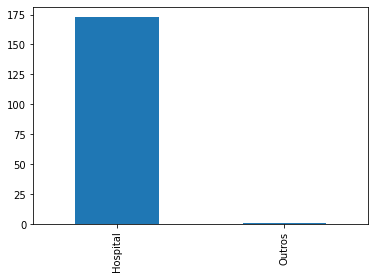

In [8]:
#Local de ocorrência do nascimento
jequitinhonha['LOCNASC'].value_counts().plot(kind='bar')
jequitinhonha['LOCNASC'].value_counts()

Solteira            82
Casada              53
União consensual    35
Viuva                1
Name: ESTCIVMAE, dtype: int64

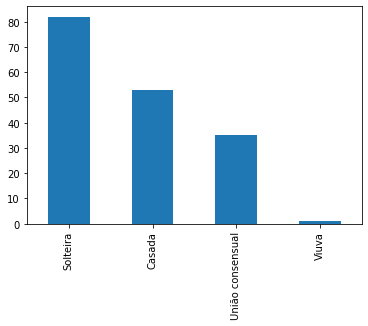

In [9]:
#Estado civil
jequitinhonha['ESTCIVMAE'].value_counts().plot(kind='bar')
jequitinhonha['ESTCIVMAE'].value_counts()

7 e mais    90
de 4 a 6    51
de 1 a 3    28
Nenhuma      5
Name: CONSULTAS, dtype: int64

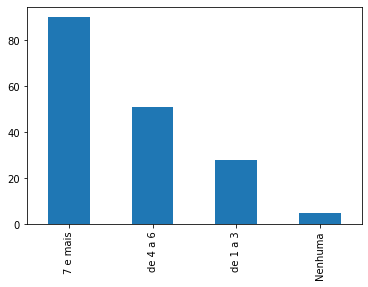

In [10]:
#Número de consultas de pré-natal
jequitinhonha['CONSULTAS'].value_counts().plot(kind='bar')
jequitinhonha['CONSULTAS'].value_counts()

Não    157
Sim     16
Name: IDANOMAL, dtype: int64

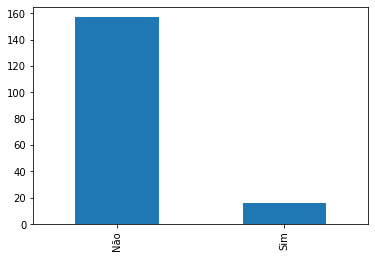

In [11]:
#Anomalia congênita
jequitinhonha['IDANOMAL'].value_counts().plot(kind='bar')
jequitinhonha['IDANOMAL'].value_counts()

Parda      143
Branca      20
Preta        6
Amarela      1
Name: RACACOR, dtype: int64

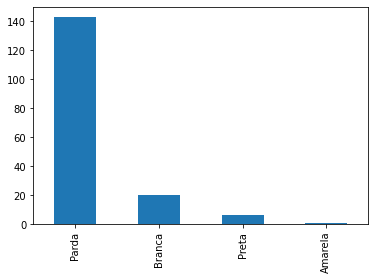

In [12]:
#Raça/Cor
jequitinhonha['RACACOR'].value_counts().plot(kind='bar')
jequitinhonha['RACACOR'].value_counts()

Vaginal    120
Cesáreo     54
Name: PARTO, dtype: int64

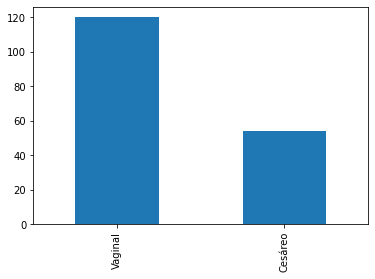

In [13]:
#Tipo de parto
jequitinhonha['PARTO'].value_counts().plot(kind='bar')
jequitinhonha['PARTO'].value_counts()

37 a 41 semanas        110
22 a 27 semanas         23
32 a 36 semanas         15
28 a 31 semanas          9
Ignorado                 8
42 semanas e mais        6
Menos de 22 semanas      3
Name: GESTACAO, dtype: int64

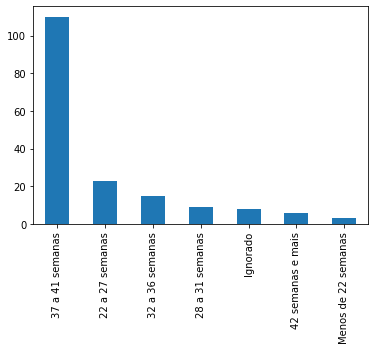

In [14]:
#Semanas de gestação
jequitinhonha['GESTACAO'].value_counts().plot(kind='bar')
jequitinhonha['GESTACAO'].value_counts()

Única    159
Dupla     15
Name: GRAVIDEZ, dtype: int64

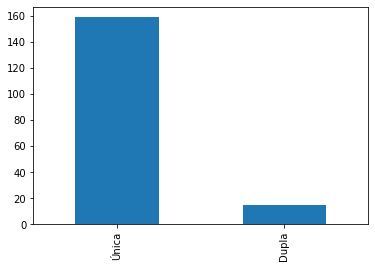

In [15]:
#Tipo de gravidez
jequitinhonha['GRAVIDEZ'].value_counts().plot(kind='bar')
jequitinhonha['GRAVIDEZ'].value_counts()

8 a 11 anos    79
4 a 7 anos     55
1 a 3 anos     21
12 e mais      10
Nenhuma         5
Ignorado        2
Name: ESCMAE, dtype: int64

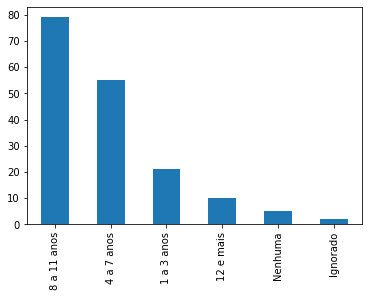

In [16]:
#Escolaridade, anos de estudo concluídos
jequitinhonha['ESCMAE'].value_counts().plot(kind='bar')
jequitinhonha['ESCMAE'].value_counts()

 20 a 24    48
15 a 19     34
25 a 29     31
30 a 34     27
35 a 39     20
40 a 44     11
10 a 14      2
45 a 49      1
<10          0
50 a 54      0
55 a 59      0
60 a 64      0
65 a 69      0
>60          0
Name: IDADEMAE, dtype: int64

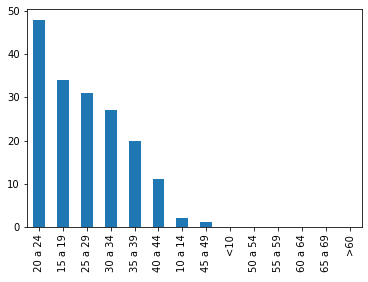

In [17]:
#Idade da mãe
jequitinhonha['IDADEMAE'].value_counts().plot(kind='bar')
jequitinhonha['IDADEMAE'].value_counts()

1 a 2      76
0          69
3 a 4      13
5 a 6      12
7 a 8       3
9 a 10      1
11 a 12     0
>12         0
Name: QTDFILVIVO, dtype: int64

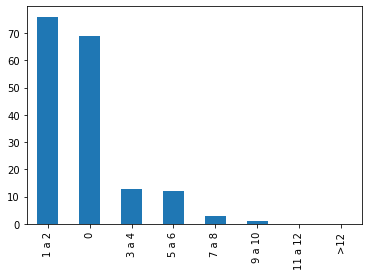

In [18]:
#Número de filhos vivos
jequitinhonha['QTDFILVIVO'].value_counts().plot(kind='bar')
jequitinhonha['QTDFILVIVO'].value_counts()

0          149
1 a 2       22
3 a 4        3
5 a 6        0
7 a 8        0
9 a 10       0
11 a 12      0
>12          0
Name: QTDFILMORT, dtype: int64

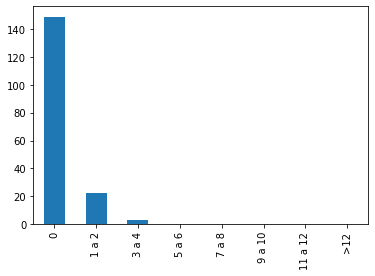

In [19]:
#Número de filhos mortos
jequitinhonha['QTDFILMORT'].value_counts().plot(kind='bar')
jequitinhonha['QTDFILMORT'].value_counts()

3000 a 3999    66
2500 a 2999    43
500 a 999      21
1500 a 2499    19
1000 a 1499    14
>=4000          7
<500            4
Name: PESO, dtype: int64

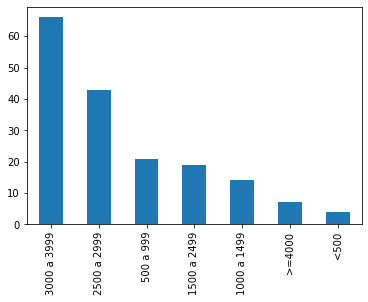

In [20]:
#Peso ao nascer, em gramas
jequitinhonha['PESO'].value_counts().plot(kind='bar')
jequitinhonha['PESO'].value_counts()

5 a 7    92
0 a 2    63
3 a 4    19
Name: APGAR1, dtype: int64

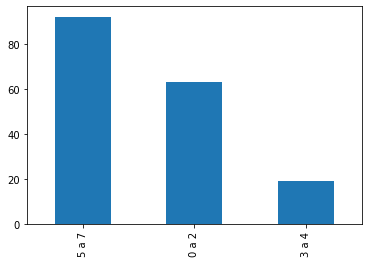

In [21]:
#Apgar no primeiro minuto
jequitinhonha['APGAR1'].value_counts().plot(kind='bar')
jequitinhonha['APGAR1'].value_counts()

0 a 2    84
5 a 7    80
3 a 4    10
Name: APGAR5, dtype: int64

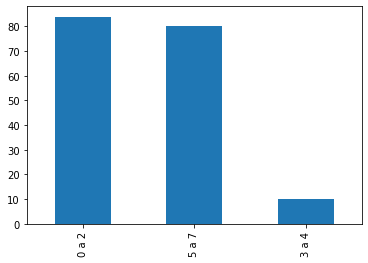

In [22]:
#Apgar no quinto minuto
jequitinhonha['APGAR5'].value_counts().plot(kind='bar')
jequitinhonha['APGAR5'].value_counts()

Masculino    101
Feminino      73
Name: SEXO, dtype: int64

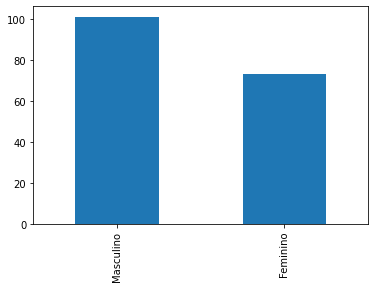

In [23]:
#Sexo
jequitinhonha['SEXO'].value_counts().plot(kind='bar')
jequitinhonha['SEXO'].value_counts()

In [24]:
jequitinhonha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 191
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CODMUNNASC  174 non-null    int64   
 1   DTNASC      174 non-null    int64   
 2   IDADEMAE    174 non-null    category
 3   ESCMAE      172 non-null    object  
 4   QTDFILVIVO  174 non-null    category
 5   QTDFILMORT  174 non-null    category
 6   GRAVIDEZ    174 non-null    object  
 7   GESTACAO    174 non-null    object  
 8   PARTO       174 non-null    object  
 9   PESO        174 non-null    category
 10  SEXO        174 non-null    object  
 11  RACACOR     170 non-null    object  
 12  APGAR1      174 non-null    category
 13  APGAR5      174 non-null    category
 14  IDANOMAL    173 non-null    object  
 15  CONSULTAS   174 non-null    object  
 16  ESTCIVMAE   171 non-null    object  
 17  LOCNASC     174 non-null    object  
 18  CLASS       174 non-null    object  
dtypes: categ

# Biologicos
- PESO 
- APGAR1 
- APGAR5 
- GESTAÇÃO 
- PARTO 
- TIPO DE GRAVIDEZ 
- ANOMALIA CONGÊNITA

# Sociais

- ESTADO CIVIL 
- IDADE DA MÃE 
- LOCAL DO PARTO 
- QUANT. DE FILHOS VIVOS 
- QUANT. DE FILHOS MORTOS 
- ESCOLARIDADE DA MÂE 
- RAÇA / COR 
- NÚMERO DE CONSULTAS MÉDICAS PRÉ NATAL 

In [25]:
biologicos = ['PESO', 'APGAR1', 'APGAR5', 'SEXO','GESTACAO', 'PARTO', 'GRAVIDEZ', 'IDANOMAL', 'CLASS']

sociais = ['ESTCIVMAE', 'IDADEMAE', 'LOCNASC', 'QTDFILVIVO', 'QTDFILMORT', 'ESCMAE', 'RACACOR', 'CONSULTAS', 'CLASS']

In [26]:
jequitinhonha_biologico_data = jequitinhonha_data[biologicos]
jequitinhonha_sociais_data = jequitinhonha_data[sociais]

jequitinhonha_biologico_df = jequitinhonha[biologicos]
jequitinhonha_sociais_df = jequitinhonha[sociais]

In [27]:
jequitinhonha_biologico_df.head()

,PESO,APGAR1,APGAR5,SEXO,GESTACAO,PARTO,GRAVIDEZ,IDANOMAL,CLASS
0,1500 a 2499,5 a 7,5 a 7,Feminino,37 a 41 semanas,Cesáreo,Única,Sim,Morto
1,2500 a 2999,0 a 2,5 a 7,Feminino,37 a 41 semanas,Vaginal,Única,Sim,Morto
2,2500 a 2999,3 a 4,5 a 7,Feminino,37 a 41 semanas,Vaginal,Única,Não,Morto
3,1000 a 1499,3 a 4,3 a 4,Masculino,37 a 41 semanas,Vaginal,Única,Não,Morto
4,3000 a 3999,5 a 7,5 a 7,Masculino,42 semanas e mais,Vaginal,Única,Não,Morto


In [28]:
jequitinhonha_sociais_df.head()

,ESTCIVMAE,IDADEMAE,LOCNASC,QTDFILVIVO,QTDFILMORT,ESCMAE,RACACOR,CONSULTAS,CLASS
0,Solteira,25 a 29,Hospital,0,1 a 2,4 a 7 anos,Parda,de 4 a 6,Morto
1,Casada,40 a 44,Hospital,5 a 6,1 a 2,4 a 7 anos,Parda,7 e mais,Morto
2,Solteira,25 a 29,Hospital,5 a 6,0,1 a 3 anos,Parda,de 4 a 6,Morto
3,Solteira,20 a 24,Hospital,1 a 2,0,8 a 11 anos,Parda,de 4 a 6,Morto
4,Viuva,35 a 39,Hospital,5 a 6,0,1 a 3 anos,Branca,de 1 a 3,Morto


In [29]:
jequitinhonha_biologico_df.to_csv('jequitinhonha_biologico.csv', index=False )
jequitinhonha_sociais_df.to_csv('jequitinhonha_sociais.csv', index=False )

jequitinhonha_biologico_data.to_csv('jequitinhonha_biologico_data.csv', index=False )
jequitinhonha_sociais_data.to_csv('jequitinhonha_sociais_data.csv', index=False )

# CLASSIFICADORES

In [30]:
from weka.classifiers import Classifier,Evaluation
from weka.core.converters import Loader
from weka.core.classes import Random

import pydotplus
from IPython.display import SVG

import weka.core.jvm as jvm
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/home/isaac/anaconda3/lib/python3.8/site-packages/javabridge/jars/rhino-1.7R4.jar', '/home/isaac/anaconda3/lib/python3.8/site-packages/javabridge/jars/runnablequeue.jar', '/home/isaac/anaconda3/lib/python3.8/site-packages/javabridge/jars/cpython.jar', '/home/isaac/anaconda3/lib/python3.8/site-packages/weka/lib/weka.jar', '/home/isaac/anaconda3/lib/python3.8/site-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [31]:
loader=Loader("weka.core.converters.CSVLoader")
cvp=Classifier(classname='weka.classifiers.meta.CVParameterSelection')

#Leeando dataset pré-processado
jequitinhonha_sociais = loader.load_file("jequitinhonha_sociais_data.csv", class_index="last")

jequitinhonha_biologico = loader.load_file("jequitinhonha_biologico_data.csv", class_index="last")


In [32]:
#Evaluação com crossvalidation, 10 particões
def classifier_estimate(data, cls_name, options=[]):
    opt=['-W',cls_name,'-X','10']
    opt=['-W',cls_name,'-X','10']
    for par in options:
        opt.append('-P')
        opt.append(par)
    cvp.options=opt
    evl = Evaluation(data)
    evl.crossvalidate_model(cvp, data, 10, Random(1))
    print(evl.percent_correct)
    print(evl.summary())
    print(evl.class_details()) 
    print(evl.matrix())
    return cvp

## Algoritmo C4.5

### Biologico

In [33]:
clf_C45_jequitinhonha_biologico = classifier_estimate(jequitinhonha_biologico,'weka.classifiers.trees.J48',['M 1 10 10','C 0.05 0.25 5'])
clf_C45_jequitinhonha_biologico

73.5632183908046

Correctly Classified Instances         128               73.5632 %
Incorrectly Classified Instances        46               26.4368 %
Kappa statistic                          0.4713
Mean absolute error                      0.3207
Root mean squared error                  0.4284
Relative absolute error                 64.1344 %
Root relative squared error             85.6678 %
Total Number of Instances              174     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,586    0,115    0,836      0,586    0,689      0,494    0,770     0,811     Morto
                 0,885    0,414    0,681      0,885    0,770      0,494    0,770     0,672     Vivo
Weighted Avg.    0,736    0,264    0,759      0,736    0,730      0,494    0,770     0,742     

=== Confusion Matrix ===

  a  b   <-- classified as
 51 36 |  a = Morto
 10 77 |  b = Vivo



CVParameterSelection: No model built yet.

In [34]:
#Regras Geradas
clf_C45_jequitinhonha_biologico.build_classifier(jequitinhonha_biologico)
clf_C45_jequitinhonha_biologico

Cross-validated Parameter selection.
Classifier: weka.classifiers.trees.J48
Cross-validation Parameter: '-M' ranged from 1.0 to 10.0 with 10.0 steps
Cross-validation Parameter: '-C' ranged from 0.05 to 0.25 with 5.0 steps
Classifier Options: -M 4 -C 0.25

J48 pruned tree
------------------

GESTACAO <= 3: Morto (35.0)
GESTACAO > 3
|   IDANOMAL <= 1: Morto (14.0/1.0)
|   IDANOMAL > 1
|   |   APGAR5 = 5 a 7
|   |   |   APGAR1 = 5 a 7
|   |   |   |   PESO = (1499, 2499]: Morto (3.0/1.0)
|   |   |   |   PESO = (2499, 2999]: Morto (5.0/1.0)
|   |   |   |   PESO = (999, 1499]: Morto (2.0)
|   |   |   |   PESO = (2999, 3999]: Vivo (13.0/5.0)
|   |   |   |   PESO = (3999, 6000]: Vivo (2.0)
|   |   |   |   PESO = (499, 999]: Morto (0.0)
|   |   |   |   PESO = (-1, 499]: Morto (0.0)
|   |   |   APGAR1 = 0 a 2: Vivo (30.0/6.0)
|   |   |   APGAR1 = 3 a 4: Morto (5.0/1.0)
|   |   APGAR5 = 3 a 4: Morto (3.0)
|   |   APGAR5 = 0 a 2: Vivo (62.0/13.0)

Number of Leaves  : 	13

Size of the tree : 	18

### Sociais

In [35]:
clf_C45_jequitinhonha_sociais = classifier_estimate(jequitinhonha_sociais,'weka.classifiers.trees.J48',['M 1 10 10','C 0.05 0.25 5'])
clf_C45_jequitinhonha_sociais  

60.91954022988506

Correctly Classified Instances         106               60.9195 %
Incorrectly Classified Instances        68               39.0805 %
Kappa statistic                          0.2184
Mean absolute error                      0.396 
Root mean squared error                  0.4596
Relative absolute error                 79.1757 %
Root relative squared error             91.8941 %
Total Number of Instances              174     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,437    0,218    0,667      0,437    0,528      0,233    0,693     0,688     Morto
                 0,782    0,563    0,581      0,782    0,667      0,233    0,693     0,686     Vivo
Weighted Avg.    0,609    0,391    0,624      0,609    0,597      0,233    0,693     0,687     

=== Confusion Matrix ===

  a  b   <-- classified as
 38 49 |  a = Morto
 19 68 |  b = Vivo



Cross-validated Parameter selection.
Classifier: weka.classifiers.trees.J48
Cross-validation Parameter: '-M' ranged from 1.0 to 10.0 with 10.0 steps
Cross-validation Parameter: '-C' ranged from 0.05 to 0.25 with 5.0 steps
Classifier Options: -M 4 -C 0.25

No classifier built

In [36]:
#Regras Geradas
clf_C45_jequitinhonha_biologico.build_classifier(jequitinhonha_sociais)
clf_C45_jequitinhonha_sociais

Cross-validated Parameter selection.
Classifier: weka.classifiers.trees.J48
Cross-validation Parameter: '-M' ranged from 1.0 to 10.0 with 10.0 steps
Cross-validation Parameter: '-C' ranged from 0.05 to 0.25 with 5.0 steps
Classifier Options: -M 3 -C 0.25

J48 pruned tree
------------------

CONSULTAS <= 2: Morto (33.0/3.0)
CONSULTAS > 2
|   RACACOR <= 2: Vivo (25.0/1.0)
|   RACACOR > 2
|   |   ESCMAE <= 3: Morto (54.0/22.0)
|   |   ESCMAE > 3: Vivo (62.0/24.0)

Number of Leaves  : 	4

Size of the tree : 	7

## Algoritmo JRIP

### Biologico

In [37]:
clf_JRip_jequitinhonha_biologico = classifier_estimate(jequitinhonha_biologico, "weka.classifiers.rules.JRip")
clf_JRip_jequitinhonha_biologico

75.28735632183908

Correctly Classified Instances         131               75.2874 %
Incorrectly Classified Instances        43               24.7126 %
Kappa statistic                          0.5057
Mean absolute error                      0.341 
Root mean squared error                  0.4334
Relative absolute error                 68.1814 %
Root relative squared error             86.6638 %
Total Number of Instances              174     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,632    0,126    0,833      0,632    0,719      0,521    0,743     0,750     Morto
                 0,874    0,368    0,704      0,874    0,779      0,521    0,743     0,670     Vivo
Weighted Avg.    0,753    0,247    0,769      0,753    0,749      0,521    0,743     0,710     

=== Confusion Matrix ===

  a  b   <-- classified as
 55 32 |  a = Morto
 11 76 |  b = Vivo



Cross-validated Parameter selection.
Classifier: weka.classifiers.rules.JRip
Classifier Options: -M 3 -C 0.25

JRIP: No model built yet.

In [38]:
#Regras Geradas
clf_JRip_jequitinhonha_biologico.build_classifier(jequitinhonha_biologico)
clf_JRip_jequitinhonha_biologico

Cross-validated Parameter selection.
Classifier: weka.classifiers.rules.JRip
Classifier Options: -F 3 -N 2.0 -O 2 -S 1

JRIP rules:

(GESTACAO >= 5) and (APGAR5 = 0 a 2) and (SEXO >= 2) => CLASS=Vivo (33.0/3.0)
(GESTACAO >= 5) and (IDANOMAL >= 2) => CLASS=Vivo (80.0/28.0)
 => CLASS=Morto (61.0/5.0)

Number of Rules : 3

### Sociais

In [39]:
clf_JRip_jequitinhonha_sociais = classifier_estimate(jequitinhonha_sociais, "weka.classifiers.rules.JRip")
clf_JRip_jequitinhonha_sociais

63.793103448275865

Correctly Classified Instances         111               63.7931 %
Incorrectly Classified Instances        63               36.2069 %
Kappa statistic                          0.2759
Mean absolute error                      0.4347
Root mean squared error                  0.4808
Relative absolute error                 86.9112 %
Root relative squared error             96.137  %
Total Number of Instances              174     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,621    0,345    0,643      0,621    0,632      0,276    0,660     0,647     Morto
                 0,655    0,379    0,633      0,655    0,644      0,276    0,660     0,634     Vivo
Weighted Avg.    0,638    0,362    0,638      0,638    0,638      0,276    0,660     0,641     

=== Confusion Matrix ===

  a  b   <-- classified as
 54 33 |  a = Morto
 30 57 |  b = Vivo



Cross-validated Parameter selection.
Classifier: weka.classifiers.rules.JRip
Classifier Options: -F 3 -N 2.0 -O 2 -S 1

JRIP: No model built yet.

In [40]:
#Regras Geradas
clf_JRip_jequitinhonha_sociais.build_classifier(jequitinhonha_sociais)
clf_JRip_jequitinhonha_sociais

Cross-validated Parameter selection.
Classifier: weka.classifiers.rules.JRip
Classifier Options: -F 3 -N 2.0 -O 2 -S 1

JRIP rules:

(CONSULTAS <= 2) => CLASS=Morto (33.0/3.0)
(ESCMAE <= 3) and (ESTCIVMAE <= 2) => CLASS=Morto (46.0/18.0)
 => CLASS=Vivo (95.0/29.0)

Number of Rules : 3

# Algoritmo Apriori

In [41]:
!pip3 install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

<ipython-input-41-730effd2ef1d>:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [42]:
class Apriori:
    """Apriori Class. Its has Apriori steps."""
    threshold = 0.5
    df = None

    def __init__(self, df, threshold=None, transform_bol=False):

        self._validate_df(df)

        self.df = df
        if threshold is not None:
            self.threshold = threshold

        if transform_bol:
            self._transform_bol()

    def _validate_df(self, df=None):

        if df is None:
            raise Exception("df must be a valid pandas.DataDrame.")


    def _transform_bol(self):

        for column in self.df.columns:
            self.df[column] = self.df[column].apply(lambda x: True if x == 1 else False)


    def _apriori(self, use_colnames=False, max_len=None, count=True):

        apriori_df = apriori(
                    self.df, 
                    min_support=self.threshold,
                    use_colnames=use_colnames, 
                    max_len=max_len
                )
        if count:
            apriori_df['length'] = apriori_df['itemsets'].apply(lambda x: len(x))

        return apriori_df

    def run(self, use_colnames=False, max_len=None, count=True):

        return self._apriori(
                        use_colnames=use_colnames,
                        max_len=max_len,
                        count=count
                    )

    def filter(self, apriori_df, length, threshold):
        
        if 'length' not in apriori_df.columns:
            raise Exception("apriori_df has no length. Please run the Apriori with count=True.")

        return apriori_df[ (apriori_df['length'] == length) & (apriori_df['support'] >= threshold) ]

### Biologico

In [43]:
jequitinhonha_biologico_morto = jequitinhonha_biologico_df[jequitinhonha_biologico_df['CLASS']=='Morto']
jequitinhonha_biologico_morto.drop('CLASS', axis=True, inplace=True)

jequitinhonha_biologico_vivo = jequitinhonha_biologico_df[jequitinhonha_biologico_df['CLASS']=='Vivo']
jequitinhonha_biologico_vivo.drop('CLASS', axis=True, inplace=True)

jequitinhonha_biologico_encod_vivo = pd.get_dummies(jequitinhonha_biologico_vivo.astype(str))
jequitinhonha_biologico_encod_morto = pd.get_dummies(jequitinhonha_biologico_morto.astype(str))

/home/isaac/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Vivo

In [44]:
apriori_runner_bio_vivo = Apriori(jequitinhonha_biologico_encod_vivo, threshold=0.5, transform_bol=True)
apriori_df_bio_vivo = apriori_runner_bio_vivo.run(use_colnames=True)
apriori_df_bio_vivo.sort_values(by=['support'], ascending=False)

,support,itemsets,length
7,0.988506,(IDANOMAL_Não),1
6,0.965517,(GRAVIDEZ_Única),1
24,0.954023,"(GRAVIDEZ_Única, IDANOMAL_Não)",2
4,0.850575,(GESTACAO_37 a 41 semanas),1
21,0.839080,"(GESTACAO_37 a 41 semanas, IDANOMAL_Não)",2
20,0.827586,"(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única)",2
36,0.816092,"(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única, IDANOMAL_Não)",3
5,0.701149,(PARTO_Vaginal),1
22,0.689655,"(PARTO_Vaginal, GRAVIDEZ_Única)",2
23,0.689655,"(PARTO_Vaginal, IDANOMAL_Não)",2


In [45]:
rules_bio_vivo = association_rules(apriori_df_bio_vivo, metric='confidence', min_threshold=0.5)
rules_bio_vivo.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
34,"(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única)",(PESO_3000 a 3999),0.827586,0.563218,0.517241,0.625000,1.109694,0.051130,1.164751
39,(PESO_3000 a 3999),"(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única)",0.563218,0.827586,0.517241,0.918367,1.109694,0.051130,2.112069
121,"(IDANOMAL_Não, PESO_3000 a 3999)","(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única)",0.551724,0.827586,0.505747,0.916667,1.107639,0.049148,2.068966
116,"(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única)","(IDANOMAL_Não, PESO_3000 a 3999)",0.827586,0.551724,0.505747,0.611111,1.107639,0.049148,1.152709
112,"(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única, IDANOMAL_Não)",(PESO_3000 a 3999),0.816092,0.563218,0.505747,0.619718,1.100316,0.046109,1.148574
...,...,...,...,...,...,...,...,...,...
126,"(APGAR1_5 a 7, GESTACAO_37 a 41 semanas, GRAVIDEZ_Única)",(IDANOMAL_Não),0.528736,0.988506,0.517241,0.978261,0.989636,-0.005417,0.528736
41,"(GESTACAO_37 a 41 semanas, PESO_3000 a 3999)",(IDANOMAL_Não),0.517241,0.988506,0.505747,0.977778,0.989147,-0.005549,0.517241
113,"(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única, PESO_3000 a 3999)",(IDANOMAL_Não),0.517241,0.988506,0.505747,0.977778,0.989147,-0.005549,0.517241
44,(IDANOMAL_Não),"(GESTACAO_37 a 41 semanas, PESO_3000 a 3999)",0.988506,0.517241,0.505747,0.511628,0.989147,-0.005549,0.988506


#### Morto

In [46]:
apriori_runner_bio_morto = Apriori(jequitinhonha_biologico_encod_morto, threshold=0.5, transform_bol=True)
apriori_df_bio_morto = apriori_runner_bio_morto.run(use_colnames=True)
apriori_df_bio_morto.sort_values(by=['support'], ascending=False)

,support,itemsets,length
2,0.862069,(GRAVIDEZ_Única),1
3,0.816092,(IDANOMAL_Não),1
8,0.689655,"(GRAVIDEZ_Única, IDANOMAL_Não)",2
0,0.678161,(SEXO_Masculino),1
1,0.678161,(PARTO_Vaginal),1
7,0.586207,"(PARTO_Vaginal, IDANOMAL_Não)",2
6,0.574713,"(PARTO_Vaginal, GRAVIDEZ_Única)",2
4,0.563218,"(SEXO_Masculino, GRAVIDEZ_Única)",2
5,0.540230,"(SEXO_Masculino, IDANOMAL_Não)",2


In [47]:
rules_bio_morto = association_rules(apriori_df_bio_morto, metric='confidence', min_threshold=0.5)
rules_bio_morto.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(PARTO_Vaginal),(IDANOMAL_Não),0.678161,0.816092,0.586207,0.864407,1.059203,0.032765,1.356322
7,(IDANOMAL_Não),(PARTO_Vaginal),0.816092,0.678161,0.586207,0.718310,1.059203,0.032765,1.142529
4,(PARTO_Vaginal),(GRAVIDEZ_Única),0.678161,0.862069,0.574713,0.847458,0.983051,-0.009909,0.904215
5,(GRAVIDEZ_Única),(PARTO_Vaginal),0.862069,0.678161,0.574713,0.666667,0.983051,-0.009909,0.965517
8,(GRAVIDEZ_Única),(IDANOMAL_Não),0.862069,0.816092,0.689655,0.800000,0.980282,-0.013872,0.919540
9,(IDANOMAL_Não),(GRAVIDEZ_Única),0.816092,0.862069,0.689655,0.845070,0.980282,-0.013872,0.890282
2,(SEXO_Masculino),(IDANOMAL_Não),0.678161,0.816092,0.540230,0.796610,0.976128,-0.013212,0.904215
3,(IDANOMAL_Não),(SEXO_Masculino),0.816092,0.678161,0.540230,0.661972,0.976128,-0.013212,0.952107
0,(SEXO_Masculino),(GRAVIDEZ_Única),0.678161,0.862069,0.563218,0.830508,0.963390,-0.021403,0.813793
1,(GRAVIDEZ_Única),(SEXO_Masculino),0.862069,0.678161,0.563218,0.653333,0.963390,-0.021403,0.928382


### Sociais

In [48]:
jequitinhonha_sociais_morto = jequitinhonha_biologico_df[jequitinhonha_biologico_df['CLASS']=='Morto']
jequitinhonha_sociais_morto.drop('CLASS', axis=True, inplace=True)

jequitinhonha_sociais_vivo = jequitinhonha_biologico_df[jequitinhonha_biologico_df['CLASS']=='Vivo']
jequitinhonha_sociais_vivo.drop('CLASS', axis=True, inplace=True)

jequitinhonha_sociais_encod_vivo = pd.get_dummies(jequitinhonha_sociais_vivo.astype(str))
jequitinhonha_sociais_encod_morto = pd.get_dummies(jequitinhonha_sociais_morto.astype(str))

/home/isaac/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Vivo

In [49]:
apriori_runner_vivo = Apriori(jequitinhonha_sociais_encod_vivo, threshold=0.5, transform_bol=True)
apriori_df_vivo = apriori_runner_vivo.run(use_colnames=True)
apriori_df_vivo.sort_values(by=['support'], ascending=False)

,support,itemsets,length
7,0.988506,(IDANOMAL_Não),1
6,0.965517,(GRAVIDEZ_Única),1
24,0.954023,"(GRAVIDEZ_Única, IDANOMAL_Não)",2
4,0.850575,(GESTACAO_37 a 41 semanas),1
21,0.839080,"(GESTACAO_37 a 41 semanas, IDANOMAL_Não)",2
20,0.827586,"(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única)",2
36,0.816092,"(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única, IDANOMAL_Não)",3
5,0.701149,(PARTO_Vaginal),1
22,0.689655,"(PARTO_Vaginal, GRAVIDEZ_Única)",2
23,0.689655,"(PARTO_Vaginal, IDANOMAL_Não)",2


In [50]:
rules_vivo = association_rules(apriori_df_vivo, metric='confidence', min_threshold=0.5)
rules_vivo.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
34,"(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única)",(PESO_3000 a 3999),0.827586,0.563218,0.517241,0.625000,1.109694,0.051130,1.164751
39,(PESO_3000 a 3999),"(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única)",0.563218,0.827586,0.517241,0.918367,1.109694,0.051130,2.112069
121,"(IDANOMAL_Não, PESO_3000 a 3999)","(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única)",0.551724,0.827586,0.505747,0.916667,1.107639,0.049148,2.068966
116,"(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única)","(IDANOMAL_Não, PESO_3000 a 3999)",0.827586,0.551724,0.505747,0.611111,1.107639,0.049148,1.152709
112,"(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única, IDANOMAL_Não)",(PESO_3000 a 3999),0.816092,0.563218,0.505747,0.619718,1.100316,0.046109,1.148574
...,...,...,...,...,...,...,...,...,...
126,"(APGAR1_5 a 7, GESTACAO_37 a 41 semanas, GRAVIDEZ_Única)",(IDANOMAL_Não),0.528736,0.988506,0.517241,0.978261,0.989636,-0.005417,0.528736
41,"(GESTACAO_37 a 41 semanas, PESO_3000 a 3999)",(IDANOMAL_Não),0.517241,0.988506,0.505747,0.977778,0.989147,-0.005549,0.517241
113,"(GESTACAO_37 a 41 semanas, GRAVIDEZ_Única, PESO_3000 a 3999)",(IDANOMAL_Não),0.517241,0.988506,0.505747,0.977778,0.989147,-0.005549,0.517241
44,(IDANOMAL_Não),"(GESTACAO_37 a 41 semanas, PESO_3000 a 3999)",0.988506,0.517241,0.505747,0.511628,0.989147,-0.005549,0.988506


#### Morto

In [51]:
apriori_runner_morto = Apriori(jequitinhonha_sociais_encod_morto, threshold=0.5, transform_bol=True)
apriori_df_morto = apriori_runner_morto.run(use_colnames=True)
apriori_df_morto.sort_values(by=['support'], ascending=False)

,support,itemsets,length
2,0.862069,(GRAVIDEZ_Única),1
3,0.816092,(IDANOMAL_Não),1
8,0.689655,"(GRAVIDEZ_Única, IDANOMAL_Não)",2
0,0.678161,(SEXO_Masculino),1
1,0.678161,(PARTO_Vaginal),1
7,0.586207,"(PARTO_Vaginal, IDANOMAL_Não)",2
6,0.574713,"(PARTO_Vaginal, GRAVIDEZ_Única)",2
4,0.563218,"(SEXO_Masculino, GRAVIDEZ_Única)",2
5,0.540230,"(SEXO_Masculino, IDANOMAL_Não)",2


In [52]:
rules_morto = association_rules(apriori_df_morto, metric='confidence', min_threshold=0.5)
rules_morto.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(PARTO_Vaginal),(IDANOMAL_Não),0.678161,0.816092,0.586207,0.864407,1.059203,0.032765,1.356322
7,(IDANOMAL_Não),(PARTO_Vaginal),0.816092,0.678161,0.586207,0.718310,1.059203,0.032765,1.142529
4,(PARTO_Vaginal),(GRAVIDEZ_Única),0.678161,0.862069,0.574713,0.847458,0.983051,-0.009909,0.904215
5,(GRAVIDEZ_Única),(PARTO_Vaginal),0.862069,0.678161,0.574713,0.666667,0.983051,-0.009909,0.965517
8,(GRAVIDEZ_Única),(IDANOMAL_Não),0.862069,0.816092,0.689655,0.800000,0.980282,-0.013872,0.919540
9,(IDANOMAL_Não),(GRAVIDEZ_Única),0.816092,0.862069,0.689655,0.845070,0.980282,-0.013872,0.890282
2,(SEXO_Masculino),(IDANOMAL_Não),0.678161,0.816092,0.540230,0.796610,0.976128,-0.013212,0.904215
3,(IDANOMAL_Não),(SEXO_Masculino),0.816092,0.678161,0.540230,0.661972,0.976128,-0.013212,0.952107
0,(SEXO_Masculino),(GRAVIDEZ_Única),0.678161,0.862069,0.563218,0.830508,0.963390,-0.021403,0.813793
1,(GRAVIDEZ_Única),(SEXO_Masculino),0.862069,0.678161,0.563218,0.653333,0.963390,-0.021403,0.928382
